### input data can be found at https://github.com/Greerlab/OSN_2021_paper and https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE169021

In [ ]:
library(dplyr)
library(ggpubr)
library(patchwork)
library(ggplot2)
library(rstatix)
library(car)
library(coin)
library(Seurat)

# Statistical analysis for figure 2c
### OR = with OR. RM = without OR. SH = shuffle control

In [13]:
OR = list.files("data/sil/OR/",pattern = "0.rds|1.rds",full.names = T)
RM = list.files("data/sil/Removed/",pattern = "0.rds|1.rds",full.names = T)
SH = list.files("data/sil/shuffle/",pattern = "0.rds|1.rds",full.names = T)

OR_v = c()
for (i in 1:length(OR)) {
  OR_v = c(OR_v, readRDS(OR[i]))
}

RM_v = c()
for (i in 1:length(RM)) {
  RM_v = c(RM_v, readRDS(RM[i]))
}

SH_v = c()
for (i in 1:length(SH)) {
  SH_v = c(SH_v, readRDS(SH[i]))
}

In [14]:
df = as.data.frame(cbind("score" = c(OR_v,RM_v,SH_v), "group" = c(rep("OR", length(OR_v)), rep("RM", length(RM_v)), rep("SH", length(SH_v)))))
df$score = as.numeric(df$score)
df$group = as.factor(df$group)

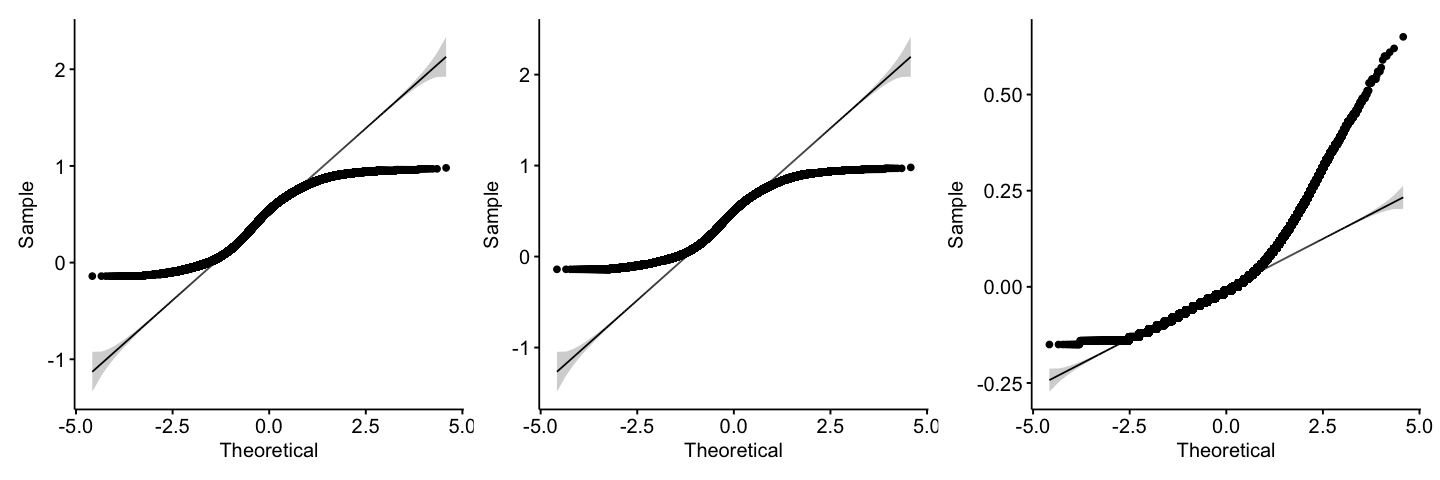

In [15]:
options(repr.plot.width=12, repr.plot.height=4)
p1 = ggqqplot(df[df$group == "OR",]$score)
p2 = ggqqplot(df[df$group == "RM",]$score)
p3 = ggqqplot(df[df$group == "SH",]$score)
p1+p2+p3

In [16]:
shapiro.test(sample(df[df$group == "OR",]$score,5000,replace = F))
shapiro.test(sample(df[df$group == "RM",]$score,5000,replace = F))
shapiro.test(sample(df[df$group == "SH",]$score,5000,replace = F))


	Shapiro-Wilk normality test

data:  sample(df[df$group == "OR", ]$score, 5000, replace = F)
W = 0.95023, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  sample(df[df$group == "RM", ]$score, 5000, replace = F)
W = 0.9497, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  sample(df[df$group == "SH", ]$score, 5000, replace = F)
W = 0.90754, p-value < 2.2e-16


In [17]:
leveneTest(df$score, df$group, center = median)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,157747.1,0
,640596,NA,NA


In [18]:
pairwise_wilcox_test(df, score ~group, p.adjust.method = "BH", exact =T, detailed = T)

,estimate,.y.,group1,group2,n1,n2,statistic,p,conf.low,conf.high,method,alternative,p.adj,p.adj.signif
,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,0.03001788,score,OR,RM,213533,213533,24182179840,1.04e-258,0.02995157,0.03004161,Wilcoxon,two.sided,1.04e-258,****
2,0.53002728,score,OR,SH,213533,213533,42723287816,0.00e+00,0.53004851,0.53998912,Wilcoxon,two.sided,0.00e+00,****
3,0.49004557,score,RM,SH,213533,213533,42121445242,0.00e+00,0.49000045,0.49000738,Wilcoxon,two.sided,0.00e+00,****


In [21]:
rstatix::wilcox_effsize(df, score ~ group, ci = T)

,.y.,group1,group2,effsize,n1,n2,conf.low,conf.high,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<ord>
1,score,OR,RM,0.05257655,213533,213533,0.05,0.06,small
2,score,OR,SH,0.75707693,213533,213533,0.76,0.76,large
3,score,RM,SH,0.73422134,213533,213533,0.73,0.74,large


# Statistical analysis for figure 2d right

In [22]:
df = read.table("data/F2d_654_result.txt")

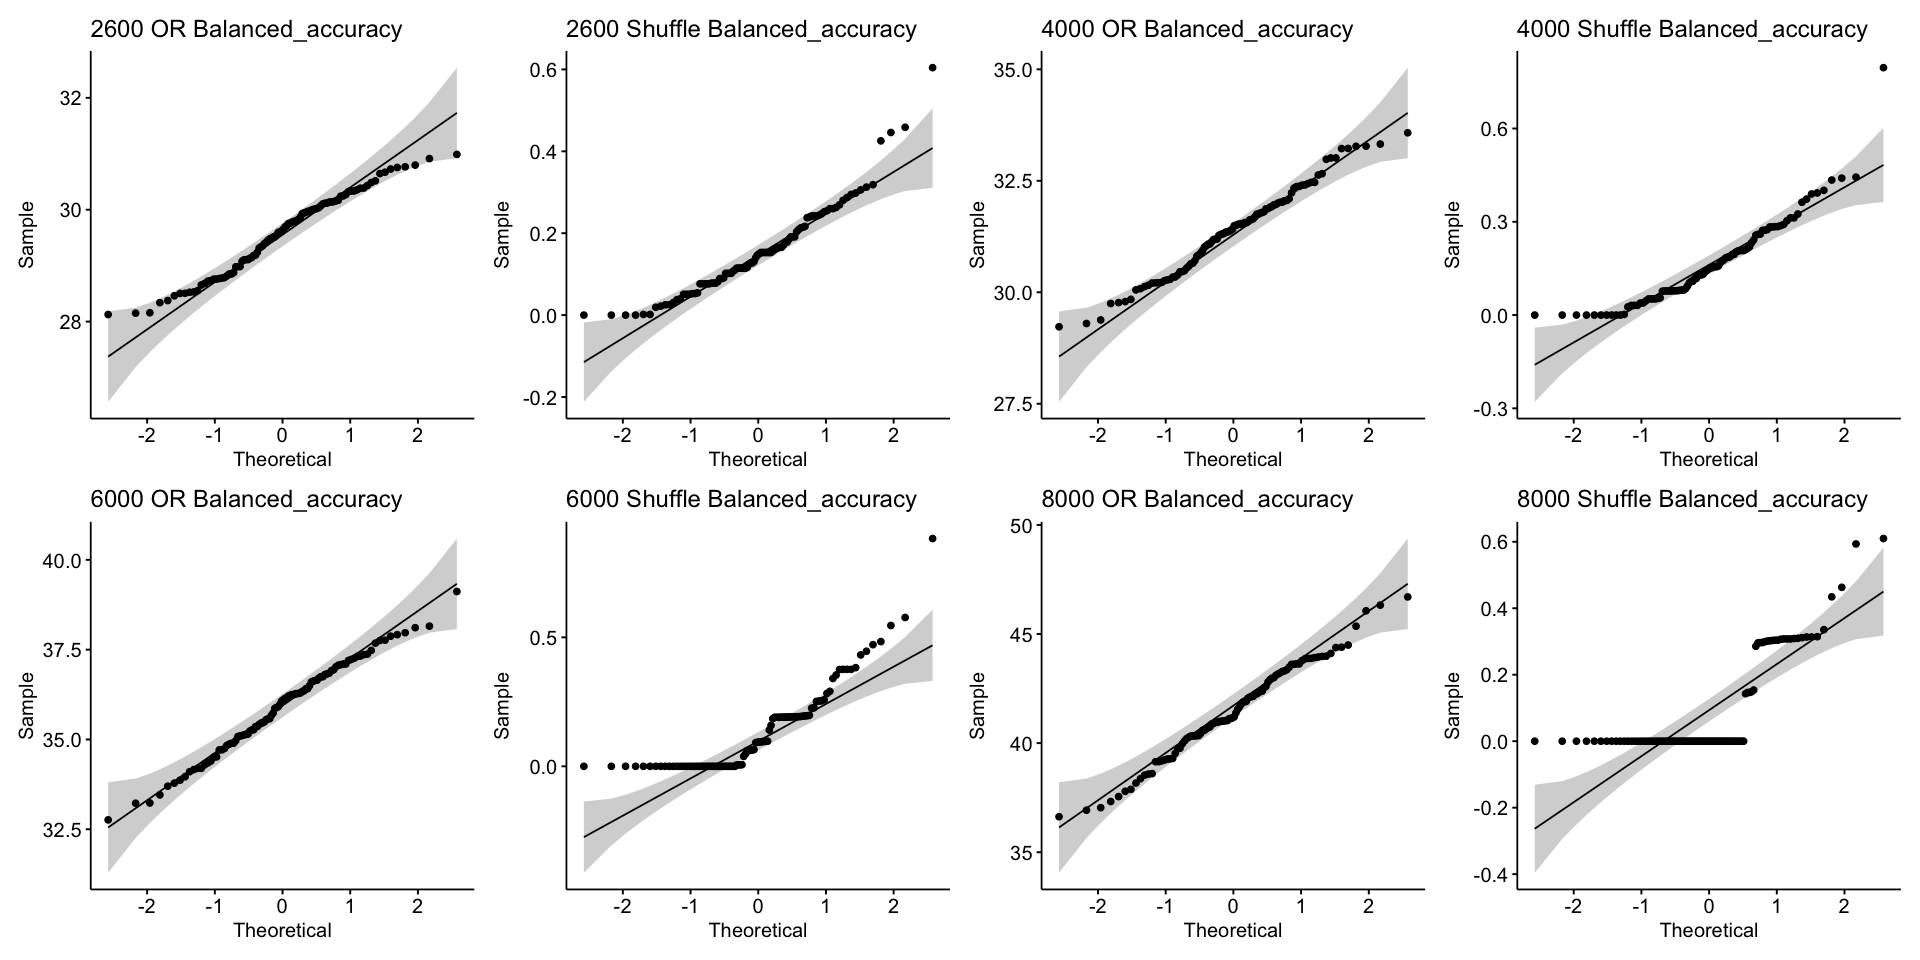

In [23]:
options(repr.plot.width=16, repr.plot.height=8)
plots = list()
r= 1
for (i in 1:length(unique(df$Threshold))) {
  inputs = unique(df$Threshold)[i]
  tmp = df[df$Threshold==inputs,]
  a = tmp[tmp$Group=="OR","Balanced_accuracy"]
  b = tmp[tmp$Group=="Shuffle","Balanced_accuracy"]
  plots[[r]] = ggqqplot(a)+ggtitle(paste(inputs,"OR","Balanced_accuracy"))
  r = r+1
  plots[[r]] = ggqqplot(b)+ggtitle(paste(inputs,"Shuffle","Balanced_accuracy"))
  r = r+1
}
wrap_plots(plots, nrow = 2, byrow = T)

In [24]:
for (i in 1:length(unique(df$Threshold))) {
  inputs = unique(df$Threshold)[i]
  tmp = df[df$Threshold==inputs,]
  a = tmp[tmp$Group=="OR","Balanced_accuracy"]
  b = tmp[tmp$Group=="Shuffle","Balanced_accuracy"]
  print(paste(inputs,"OR","Balanced_accuracy"))  
  print(shapiro.test(a))
  print(paste(inputs,"Shuffle","Balanced_accuracy"))  
  print(shapiro.test(b))
  print(leveneTest(tmp$Balanced_accuracy, tmp$Group, center = median))
}

[1] "2600 OR Balanced_accuracy"

	Shapiro-Wilk normality test

data:  a
W = 0.97404, p-value = 0.04543

[1] "2600 Shuffle Balanced_accuracy"

	Shapiro-Wilk normality test

data:  b
W = 0.92439, p-value = 2.426e-05



Warning message in leveneTest.default(tmp$Balanced_accuracy, tmp$Group, center = median):
“tmp$Group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
       Df F value    Pr(>F)    
group   1  180.07 < 2.2e-16 ***
      198                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "4000 OR Balanced_accuracy"

	Shapiro-Wilk normality test

data:  a
W = 0.98562, p-value = 0.3515

[1] "4000 Shuffle Balanced_accuracy"

	Shapiro-Wilk normality test

data:  b
W = 0.90243, p-value = 1.842e-06



Warning message in leveneTest.default(tmp$Balanced_accuracy, tmp$Group, center = median):
“tmp$Group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
       Df F value    Pr(>F)    
group   1  133.77 < 2.2e-16 ***
      198                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "6000 OR Balanced_accuracy"

	Shapiro-Wilk normality test

data:  a
W = 0.99073, p-value = 0.7238

[1] "6000 Shuffle Balanced_accuracy"

	Shapiro-Wilk normality test

data:  b
W = 0.80498, p-value = 3.531e-10



Warning message in leveneTest.default(tmp$Balanced_accuracy, tmp$Group, center = median):
“tmp$Group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
       Df F value    Pr(>F)    
group   1  150.74 < 2.2e-16 ***
      198                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "8000 OR Balanced_accuracy"

	Shapiro-Wilk normality test

data:  a
W = 0.98837, p-value = 0.536

[1] "8000 Shuffle Balanced_accuracy"

	Shapiro-Wilk normality test

data:  b
W = 0.63528, p-value = 2.119e-14



Warning message in leveneTest.default(tmp$Balanced_accuracy, tmp$Group, center = median):
“tmp$Group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
       Df F value    Pr(>F)    
group   1  162.42 < 2.2e-16 ***
      198                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [25]:
for (i in 1:length(unique(df$Threshold))) {
  inputs = unique(df$Threshold)[i]
  tmp = df[df$Threshold==inputs,]
  x = rstatix::wilcox_test( tmp, Balanced_accuracy ~Group, exact =T, detailed = T)
  print( x)
}

# A tibble: 1 × 12
  estimate .y.   group1 group2    n1    n2 statistic        p conf.low conf.high
*    <dbl> <chr> <chr>  <chr>  <int> <int>     <dbl>    <dbl>    <dbl>     <dbl>
1     29.5 Bala… OR     Shuff…   100   100     10000 2.54e-34     29.3      29.7
# … with 2 more variables: method <chr>, alternative <chr>
# A tibble: 1 × 12
  estimate .y.   group1 group2    n1    n2 statistic        p conf.low conf.high
*    <dbl> <chr> <chr>  <chr>  <int> <int>     <dbl>    <dbl>    <dbl>     <dbl>
1     31.3 Bala… OR     Shuff…   100   100     10000 2.54e-34     31.1      31.4
# … with 2 more variables: method <chr>, alternative <chr>
# A tibble: 1 × 12
  estimate .y.   group1 group2    n1    n2 statistic        p conf.low conf.high
*    <dbl> <chr> <chr>  <chr>  <int> <int>     <dbl>    <dbl>    <dbl>     <dbl>
1     35.9 Bala… OR     Shuff…   100   100     10000 1.59e-34     35.5      36.2
# … with 2 more variables: method <chr>, alternative <chr>
# A tibble: 1 × 12
  estimate .y.   g

In [26]:
df %>% group_by(Threshold) %>% wilcox_effsize(Balanced_accuracy ~Group, ci = T)

,.y.,group1,group2,effsize,Threshold,n1,n2,conf.low,conf.high,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<ord>
1,Balanced_accuracy,OR,Shuffle,0.8639180,2600,100,100,0.85,0.86,large
2,Balanced_accuracy,OR,Shuffle,0.8639248,4000,100,100,0.85,0.86,large
3,Balanced_accuracy,OR,Shuffle,0.8666190,6000,100,100,0.86,0.87,large
4,Balanced_accuracy,OR,Shuffle,0.8830041,8000,100,100,0.87,0.89,large


# Statistical analysis for figure 2d left

In [27]:
df = read.table("data/F2d_10_result.txt")

In [28]:
for (i in 1:length(unique(df$Threshold))) {
  inputs = unique(df$Threshold)[i]
  tmp = df[df$Threshold==inputs,]
  x = rstatix::wilcox_test( tmp, Balanced_accuracy ~Group, exact =T, detailed = T)
  print( x)
}

# A tibble: 1 × 12
  estimate .y.   group1 group2    n1    n2 statistic        p conf.low conf.high
*    <dbl> <chr> <chr>  <chr>  <int> <int>     <dbl>    <dbl>    <dbl>     <dbl>
1     84.2 Bala… OR     Shuff…   100   100     10000 2.21e-59     83.9      84.6
# … with 2 more variables: method <chr>, alternative <chr>
# A tibble: 1 × 12
  estimate .y.   group1 group2    n1    n2 statistic        p conf.low conf.high
*    <dbl> <chr> <chr>  <chr>  <int> <int>     <dbl>    <dbl>    <dbl>     <dbl>
1     84.6 Bala… OR     Shuff…   100   100     10000 2.21e-59     84.3      84.9
# … with 2 more variables: method <chr>, alternative <chr>
# A tibble: 1 × 12
  estimate .y.   group1 group2    n1    n2 statistic        p conf.low conf.high
*    <dbl> <chr> <chr>  <chr>  <int> <int>     <dbl>    <dbl>    <dbl>     <dbl>
1     86.1 Bala… OR     Shuff…   100   100     10000 2.21e-59     85.7      86.6
# … with 2 more variables: method <chr>, alternative <chr>
# A tibble: 1 × 12
  estimate .y.   g

In [29]:
df %>% group_by(Threshold) %>% wilcox_effsize(Balanced_accuracy ~Group, ci = T)

,.y.,group1,group2,effsize,Threshold,n1,n2,conf.low,conf.high,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<ord>
1,Balanced_accuracy,OR,Shuffle,0.8638684,2600,100,100,0.85,0.86,large
2,Balanced_accuracy,OR,Shuffle,0.8638684,4000,100,100,0.85,0.86,large
3,Balanced_accuracy,OR,Shuffle,0.8638684,6000,100,100,0.85,0.86,large
4,Balanced_accuracy,OR,Shuffle,0.8638778,8000,100,100,0.85,0.86,large


# Statistical analysis for figure 2e
### simi = protein sequence similarity, chr = chromosome, cls = genome cluster

In [30]:
df  = read.table("data/prediction_error_info_fold_change.txt", header = T)

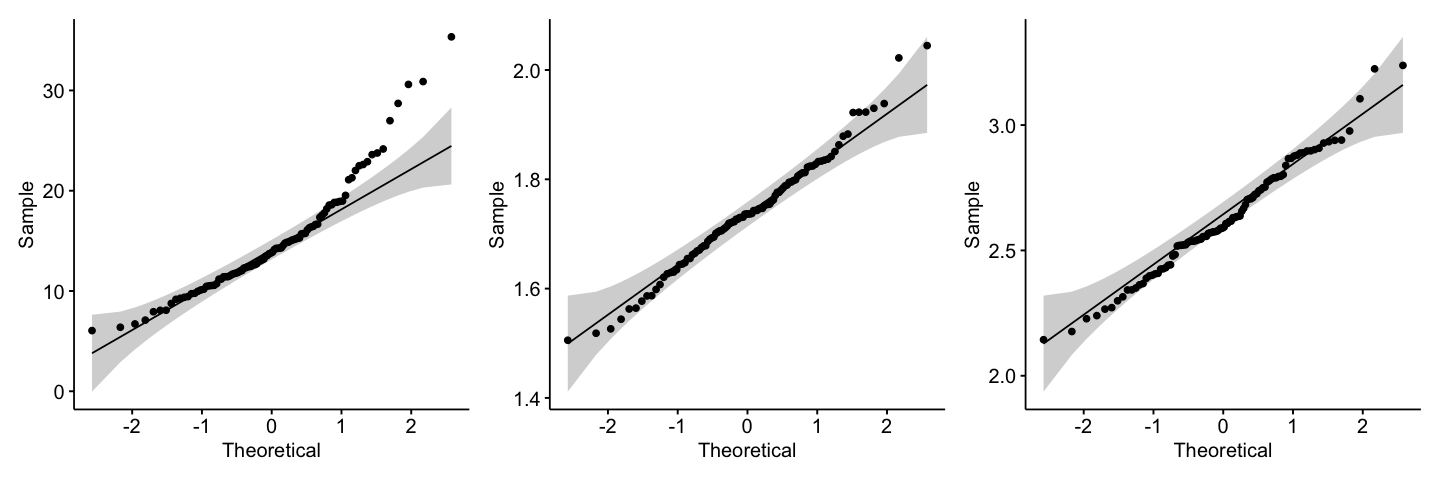

In [31]:
options(repr.plot.width=12, repr.plot.height=4)
p1 = ggqqplot(df[df$group == "simi",]$value)
p2 = ggqqplot(df[df$group == "chr",]$value)
p3 = ggqqplot(df[df$group == "cls",]$value)
p1+p2+p3

In [33]:
for (i in 1:length(unique(df$group))) {
  inputs = unique(df$group)[i]
  tmp = df[df$group==inputs,]
  print(inputs)  
  print(shapiro.test(tmp$value))
}
leveneTest(df$value, df$group, center = median)

[1] "simi"

	Shapiro-Wilk normality test

data:  tmp$value
W = 0.91233, p-value = 5.642e-06

[1] "chr"

	Shapiro-Wilk normality test

data:  tmp$value
W = 0.98664, p-value = 0.4138

[1] "cls"

	Shapiro-Wilk normality test

data:  tmp$value
W = 0.98558, p-value = 0.3492



Warning message in leveneTest.default(df$value, df$group, center = median):
“df$group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,96.17285,6.257345e-33
,297,NA,NA


In [34]:
pairwise_wilcox_test(df, value ~group, p.adjust.method = "BH", exact =T, detailed = T)

,estimate,.y.,group1,group2,n1,n2,statistic,p,conf.low,conf.high,method,alternative,p.adj,p.adj.signif
,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,-0.87466,value,chr,cls,100,100,0,2.21e-59,-0.9243767,-0.8296805,Wilcoxon,two.sided,2.21e-59,****
2,-12.10671,value,chr,simi,100,100,0,2.21e-59,-13.0413655,-11.0854622,Wilcoxon,two.sided,2.21e-59,****
3,-11.24368,value,cls,simi,100,100,0,2.21e-59,-12.1100326,-10.2104330,Wilcoxon,two.sided,2.21e-59,****


In [35]:
wilcox_effsize(df, value ~group, ci = T)

,.y.,group1,group2,effsize,n1,n2,conf.low,conf.high,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<ord>
1,value,chr,cls,0.8638684,100,100,0.85,0.86,large
2,value,chr,simi,0.8638684,100,100,0.85,0.86,large
3,value,cls,simi,0.8638684,100,100,0.85,0.86,large


# Statistical analysis for figure 2f
### distance = TSS distance, similarity = protein sequence similarity, correlation = transcriptome correlation

In [36]:
df = read.table("data/TSS_results.txt", header = T)

In [37]:
summary(lm(similarity~distance, df))
summary(lm(correlation~distance, df))


Call:
lm(formula = similarity ~ distance, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43467 -0.07798 -0.00726  0.06603  0.45741 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.447e-01  6.793e-04   801.8   <2e-16 ***
distance    -5.695e-08  4.163e-10  -136.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1152 on 66564 degrees of freedom
Multiple R-squared:  0.2194,	Adjusted R-squared:  0.2194 
F-statistic: 1.871e+04 on 1 and 66564 DF,  p-value: < 2.2e-16



Call:
lm(formula = correlation ~ distance, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04377 -0.28735  0.01896  0.29509  0.96322 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.738e-01  2.188e-03  125.15   <2e-16 ***
distance    -8.338e-08  1.341e-09  -62.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3711 on 66564 degrees of freedom
Multiple R-squared:  0.0549,	Adjusted R-squared:  0.05488 
F-statistic:  3866 on 1 and 66564 DF,  p-value: < 2.2e-16


In [38]:
cor.test(df$distance, df$similarity)
cor.test(df$distance, df$correlation)


	Pearson's product-moment correlation

data:  df$distance and df$similarity
t = -136.78, df = 66564, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4743225 -0.4624626
sample estimates:
       cor 
-0.4684136 



	Pearson's product-moment correlation

data:  df$distance and df$correlation
t = -62.181, df = 66564, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2414703 -0.2271110
sample estimates:
       cor 
-0.2343034 


# Statistical analysis for extended figure 6a

In [41]:
Sets = c()
Reps = c()
RNA_count = c()
Gene_count = c()
for (x in 1:2) {
  for (i in 1:20) {
    slide = readRDS(paste0("data/OB",x,"_slideseq/Slide",i,".rds"))
    RNA_count = c(RNA_count,slide$nCount_RNA)
    Gene_count = c(Gene_count,slide$nFeature_RNA)
    Sets = c(Sets,rep(x,ncol(slide)))
    Reps = c(Reps,rep(i,ncol(slide)))
  }
}
df = cbind.data.frame(Sets,Reps,RNA_count,Gene_count)
df$Sets = factor(df$Sets)
df$Reps = factor(df$Reps)

In [42]:
print("Row: slides , Column: OB reps")
table(df$Reps, df$Sets)

[1] "Row: slides , Column: OB reps"


    
         1     2
  1  30827 30041
  2  35355 34997
  3  40365 41337
  4  43840 46648
  5  55086 42455
  6  52364 50483
  7  49682 49562
  8  47024 45535
  9  56016 39903
  10 47249 37956
  11 53359 41202
  12 49049 44306
  13 47076 38022
  14 45479 49988
  15 46893 49694
  16 49717 51734
  17 43088 50418
  18 50225 49625
  19 52795 52260
  20 51450 35047